## __Font Setting__

In [117]:
# -*- coding: utf-8 -*-
import matplotlib.font_manager as fm
import matplotlib
import pandas as pd
font_location='/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf'
font_name=fm.FontProperties(fname=font_location).get_name()
#print(font_name)
matplotlib.rc('font', family=font_name)
#matplotlib.matplotlib_fname()
company_name='롯데정밀화학'
target_label='영업이익(손실)'

## DART API connect

In [118]:
import dart_fss as dart
api_key='fcb0b5b6663759936ad3c7dbf488b1ead9459fd0'
dart.dart_set_api_key(api_key=api_key)
crp_list=dart.get_crp_list()


## Company matching

In [119]:
company_list=crp_list.find_by_name(company_name)
company_list

[[004000]롯데정밀화학]

In [120]:
company_crp=crp_list.find_by_crp_cd('004000')

## Download Reports from DART

In [121]:
#fs_annual = samsung_electronics.get_financial_statement(start_dt='20180101')

In [122]:
print(company_crp)

[004000]롯데정밀화학


In [123]:
df = company_crp.get_financial_statement(start_dt='20120101')

Output()

Output()

In [124]:
#is 연결손익계산서, ci 연결포괄손익계산서
is_annual=df['is']

In [125]:
if (is_annual is None):
    is_annual=df['ci']

In [126]:
#with pd.option_context("display.max_rows", 1000):
#display(is_annual)

## Get '영업손실' Index

In [127]:
try:
    check_table=is_annual.iloc[:,1]==target_label
    index=check_table[check_table].index[0]
except IndexError:
    target_label='영업이익'
    check_table=is_annual.iloc[:,1]==target_label
    index=check_table[check_table].index[0]

## Get Years' Value Stored Location

In [128]:
column_index=0
for tuple_column in is_annual.columns:
    if tuple_column[0].startswith('2'):
        break
    column_index=column_index+1

## Get Area Interested in

In [129]:
is_annual_modi=is_annual.iloc[index][column_index:]
#is_annual_modi.index

## Result series index modification

In [130]:
index_array=[]
for tu in is_annual_modi.index:
    index_array.append(tu[0])

is_annual_modi.index=index_array

## string result convert to integer value

In [131]:
is_annual_modi
is_annual_modi=is_annual_modi.dropna()

is_annual_modi=pd.to_numeric(is_annual_modi)
is_annual_modi=is_annual_modi.dropna()

## Unit Change from '원' to '조'

In [132]:
is_annual_modi=is_annual_modi[:]/1000000000000

## Draw Graph

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

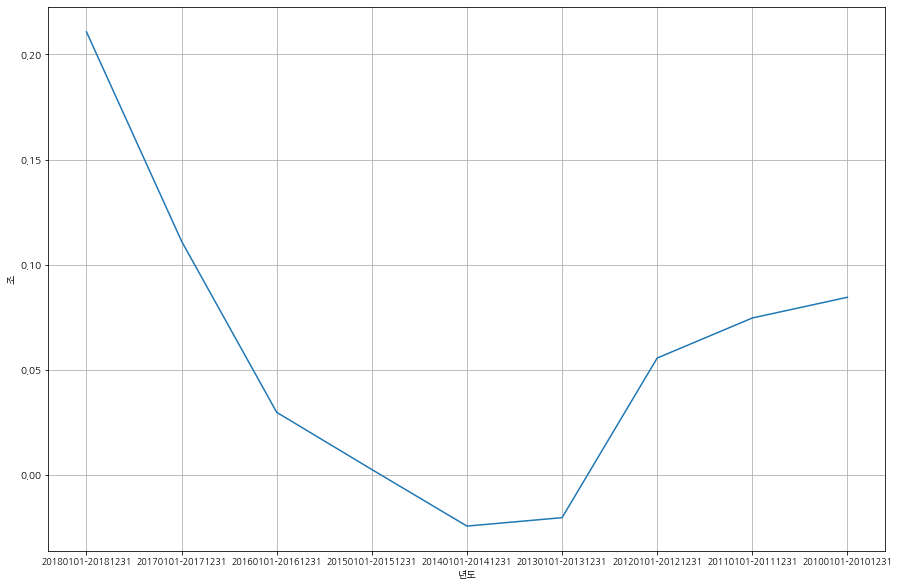

In [133]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(is_annual_modi)
plt.xlabel('년도')
plt.ylabel('조')
plt.grid(True)
plt.xticks(size=9)

#is_annual_modi.plot(kind='line', title='test',figsize=(15,10) )